### Import Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Data

In [2]:
df = pd.read_excel('Raw Data/Unemployment Rate Aged 15 Years And Over, End June, Annual, Seasonally Adjusted.xlsx', header = None, dtype=str)

### Data Cleaning

In [3]:
# Remove rows with NaN values
df = df.dropna()

# Transpose the DataFrame
df = df.T

# Use the first row as the header
df.columns = df.iloc[0]

# Drop the first row
df = df[1:]

df.head()

,Data Series,"Total Unemployment Rate, (SA)","Resident Unemployment Rate, (SA)"
1,2022,2.1,2.8
2,2021,2.7,3.6
3,2020,2.9,4
4,2019,2.3,3.2
5,2018,2.1,2.9


In [4]:
df.dtypes

0
Data Series                         object
Total Unemployment Rate, (SA)       object
Resident Unemployment Rate, (SA)    object
dtype: object

### Extracting Columns

In [5]:
# select columns
unemployment_rate = df[['Data Series', 'Resident Unemployment Rate, (SA)']]

# sort dataframe by year column
unemployment_rate = unemployment_rate.sort_values(by='Data Series')

# rename columns
unemployment_rate = unemployment_rate.rename(columns={'Data Series': 'Year', 'Resident Unemployment Rate, (SA)': 'Unemployment Rate'})

# strip spaces
unemployment_rate['Year'] = unemployment_rate['Year'].str.strip()
unemployment_rate['Unemployment Rate'] = unemployment_rate['Unemployment Rate'].str.strip()

# convert the "Year" column to datetime format
unemployment_rate['Year'] = pd.to_datetime(unemployment_rate['Year'], format='%Y')

# convert the "Full-Time" column to float format
unemployment_rate['Unemployment Rate'] = unemployment_rate['Unemployment Rate'].astype(float)

unemployment_rate.head()

,Year,Unemployment Rate
31,1992-01-01,2.1
30,1993-01-01,2.1
29,1994-01-01,2.0
28,1995-01-01,2.3
27,1996-01-01,2.2


In [6]:
unemployment_rate.dtypes

0
Year                 datetime64[ns]
Unemployment Rate           float64
dtype: object

### Plot Yearly Data

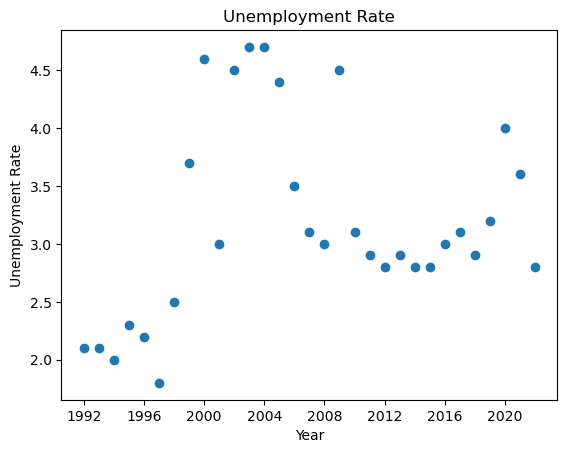

In [7]:
# Plot the data
plt.scatter(x='Year', y='Unemployment Rate', data=unemployment_rate)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate')

# Show the plot
plt.show()

In [13]:
# Export yearly data to CSV
unemployment_rate.to_csv('Cleaned Data/Unemployment Rate.csv')